In [1]:
from fastai.text import * 

In [2]:
path = untar_data(URLs.IMDB_SAMPLE)
path

PosixPath('/home/danywin/.fastai/data/imdb_sample')

In [3]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [4]:
# Language model data
data_lm = TextLMDataBunch.from_csv(path, 'texts.csv')
# Classifier model data
data_clas = TextClasDataBunch.from_csv(path, 'texts.csv', vocab=data_lm.train_ds.vocab, bs=32)

In [5]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.316407,3.908863,0.284628,00:22


In [6]:
learn.unfreeze()
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.937371,3.831196,0.293839,00:28


In [7]:
learn.predict("This is a review about", n_words=10)

'This is a review about a new mysterious mystery from that crushed piece of'

In [8]:
learn.save_encoder('ft_enc')

In [9]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (799 items)
x: TextList
xxbos xxmaj doc xxmaj savage : xxmaj the xxmaj man of xxmaj bronze is a horrible movie . xxmaj poorly scripted , over - acted , and just plain silly . xxmaj that being said ... it is actually an enjoyable movie on some level . xxmaj this movie begs to be watched in a group with an xxunk supply of cheap beer . xxmaj it 's one of those movies like " xxmaj santa xxmaj claus conquers the xxmaj martians " or " xxmaj xxunk , the xxmaj hunter from the xxmaj future " ... so bad it is almost good . xxmaj if you have the right group of people this movie is a blast to watch . xxmaj it 's campy . xxmaj it 's fun . xxmaj it has a theme by xxmaj xxunk . xxmaj if you 're looking for a good movie though , look elsewhere . 3 / 10 . 
 
  xxup xxunk , i 've heard rumors some studio is exploring the possibility of a remake ...,xxbos i saw this movie literally directly after xxunk the book , and maybe that was a neutral idea or a 

In [10]:
learn.data.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , steaming bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj sydney , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj this film sat on my xxmaj xxunk for weeks before i watched it . i dreaded a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj yorkers . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos i really wanted to love this show . i truly , honestly did . \n \n xxmaj for the first time , gay viewers get their own version of the "" xxmaj the xxmaj bachelor "" . xxmaj with the help of his obligatory "" hag "" xxmaj xxunk , xxmaj james , a good looking , well - to - do thirty - something has the chance",negative


In [11]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.635551,0.633270,0.646766,00:20


In [12]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(5e-3/2., 5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.513393,0.485165,0.800995,00:21


In [13]:
learn.unfreeze()
learn.fit_one_cycle(1, slice(2e-3/100, 2e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.375651,0.392487,0.835821,00:42


In [14]:
from fastai_bayesian_nn.custom_dropout import CustomDropout, switch_custom_dropout, convert_layers
from fastai_bayesian_nn.bayesian import (entropy, BALD, uncertainty_best_probability,
                      get_preds_sample, plot_hist_groups, top_k_uncertainty)

In [15]:
get_args = lambda dp : {"p" : dp.p}
convert_layers(learn.model,nn.Dropout,CustomDropout,get_args)

In [16]:
learn.model

SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(8872, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(8872, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 1152, batch_first=True)
        )
        (1): WeightDropout(
          (module): LSTM(1152, 1152, batch_first=True)
        )
        (2): WeightDropout(
          (module): LSTM(1152, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0): RNNDropout()
        (1): RNNDropout()
        (2): RNNDropout()
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): CustomDropout(p=0.2, activate=True)
      (2): Linear(in_features=1200, out_features=50, bias=True)
      (3): ReLU(inplace=True)
      (4): BatchNorm1d(

In [17]:
switch_custom_dropout(learn.model,False,True)

Current active : True
Switching to : False
Current active : True
Switching to : False


In [18]:
pred,y = learn.get_preds()
accuracy(pred,y)

tensor(0.8358)

In [19]:
switch_custom_dropout(learn.model,True,True)

Current active : False
Switching to : True
Current active : False
Switching to : True


In [20]:
pred,y = get_preds_sample(learn)
accuracy(pred.mean(dim=0),y)

tensor(0.8408)

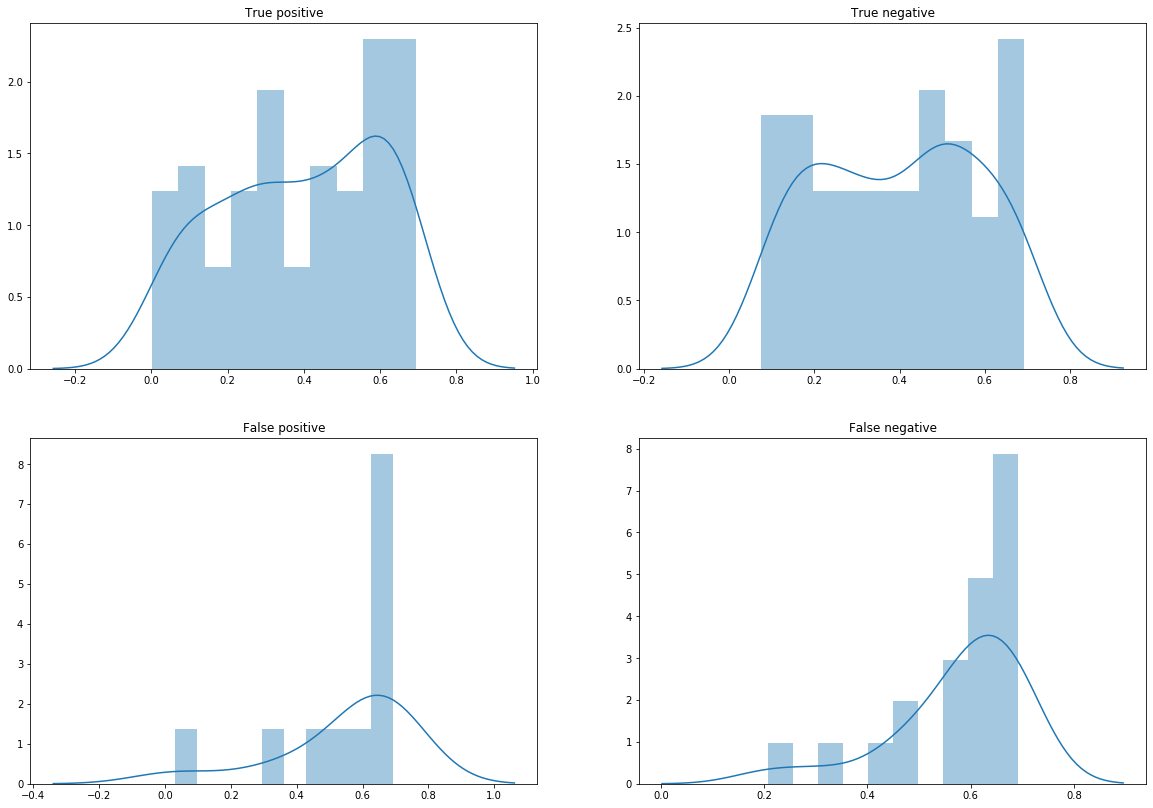

In [31]:
plot_hist_groups(pred,y,entropy,bins=10,figsize=(20,14))

In [23]:
H = uncertainty_best_probability(pred)
idx = top_k_uncertainty(H,reverse=False)
for review in learn.data.valid_ds[idx]:
    print("_____________")
    print("Review : ")

_____________
Review : 
> <ipython-input-23-87a677b6e10b>(3)<module>()
-> for review in learn.data.valid_ds[idx]:
(Pdb) review
(Text xxbos xxmaj do n't bother . a little xxunk could go a long way , but all we get is pure ham , particularly from xxmaj dunaway . xxmaj the plot is one of those bumper car episodes ... the vehicle bounces into another and everything changes direction again , until we are merely xxunk our heads wondering if there were ever a plot . xxmaj gina xxmaj phillips is actually good , but it 's hard playing across from a xxunk xxmaj dunaway playing xxmaj lady xxmaj xxunk lost in the xxmaj marx 's xxmaj brother 's xxmaj duck xxmaj xxunk . xxmaj ah , the xxmaj raven ... now there 's an actor . xxmaj and there is the relative who just lies and bed and looks xxunk . xxmaj or xxmaj dr. xxmaj xxunk who 's filled with lots of gloom and no working xxunk . i 'm one of those xxunk who just has to see a movie to the end . xxmaj xxunk the xxmaj raven , " xxmaj xxunk . ", Categor

BdbQuit: 

In [29]:
x = learn.data.train_ds.x

In [30]:
x

TextList (799 items)
xxbos xxmaj doc xxmaj savage : xxmaj the xxmaj man of xxmaj bronze is a horrible movie . xxmaj poorly scripted , over - acted , and just plain silly . xxmaj that being said ... it is actually an enjoyable movie on some level . xxmaj this movie begs to be watched in a group with an xxunk supply of cheap beer . xxmaj it 's one of those movies like " xxmaj santa xxmaj claus conquers the xxmaj martians " or " xxmaj xxunk , the xxmaj hunter from the xxmaj future " ... so bad it is almost good . xxmaj if you have the right group of people this movie is a blast to watch . xxmaj it 's campy . xxmaj it 's fun . xxmaj it has a theme by xxmaj xxunk . xxmaj if you 're looking for a good movie though , look elsewhere . 3 / 10 . 
 
  xxup xxunk , i 've heard rumors some studio is exploring the possibility of a remake ...,xxbos i saw this movie literally directly after xxunk the book , and maybe that was a neutral idea or a very stupid one . i think it was the latter . xxmaj firs